In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import collections
train_set_num, test_set_num = 500,500

In [2]:
def concate_files(file1,file2,final_file):
      data = data2 = ""
      with open(file1, 'r', encoding='utf-8') as fp:  # Reading data from file1
            sentences = fp.readlines()
            for sentence in sentences[:train_set_num]:
                  data += sentence
      with open(file2, 'r', encoding='utf-8') as fp:  # Reading data from file2
            sentences = fp.readlines()
            for sentence in sentences[:test_set_num]:
                  data2 += sentence
      data += data2  # To add the data of file2
      with open (final_file, 'w', encoding='utf-8') as fp:
            fp.write(data)
concate_files('data/total/pos.txt','data/total/neg.txt','data/total/labeled_text.txt')

In [3]:
data = pd.read_csv('data/total/labeled_text.txt', header = None, delimiter='    ',encoding='utf-8',names=['Label', 'Text'])
data.head()

d:\Downloads\python3.7\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Label,Text
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.Label.unique()

array([ 1, -1], dtype=int64)

In [6]:
data.shape

(1000, 2)

In [7]:
#Assign Label to each sentence
pos = []
neg = []
for label in data.Label:
    if label == -1:        #negative
        pos.append(0)
        neg.append(1)
    elif label == 1:      #positive
        pos.append(1)
        neg.append(0)
data['Positive']= pos
data['Negative']= neg
data.head()

,Label,Text,Positive,Negative
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...",1,0
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!,1,0
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。,1,0
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...,1,0
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风",1,0


In [8]:
stopword_ls = []
def getStopWord():
    with open('lib/stopwords_utf8.txt', 'r',encoding='UTF-8') as file:
        for line in file:
            stopword_ls.append(line.split('\n')[0])
getStopWord()

def isStopWord(word):
    for i in range(len(stopword_ls)):
        if word == stopword_ls[i]:
            return True
    return False

In [9]:
import jieba
from snownlp import SnowNLP
import random

def jieba_segment(text):
    word_ls = []
    tmp_ls = list(jieba.cut(text, cut_all=False))   #segmentation
    for i in range(len(tmp_ls)):
        if not isStopWord(tmp_ls[i]):
            word_ls.append(tmp_ls[i]) 
    return word_ls

def snow_segment(text):
    word_ls = []
    tmp_ls = SnowNLP(text).words  #segmentation  
    for i in range(len(tmp_ls)):
        if not isStopWord(tmp_ls[i]):
            word_ls.append(tmp_ls[i]) 
    return word_ls

random.shuffle(data['Text'])
#data['Segmented_Text'] = data['Text'].apply(lambda x: jieba_segment(x))
data['Segmented_Text'] = data['Text'].apply(lambda x: snow_segment(x))
data.head()

d:\Downloads\python3.7\lib\random.py:278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


,Label,Text,Positive,Negative,Segmented_Text
0,1,很怀疑五星酒店的评价标准。三星都不如，很失望！,1,0,"[怀疑, 五星, 酒店, 评价, 标准, 星, 失望]"
1,1,客观地说，这个酒店不怎么样。列出来大家参考：一、晚上八点半到的，没看到门童；二、没有吹风机，...,1,0,"[客观, 说, 酒店, 列, 参考, 晚上, 八点半, 门, 童, 吹风, 机, 网线, 收..."
2,1,"物超所值,此次我们是订的三个房间。感慨中西部的服务有时比发达地区好多了。宾馆反馈2008年8...",1,0,"[物, 超所值, 是订, 房间, 感慨, 中西部, 服务, 发达, 地区, 宾馆, 反馈, ..."
3,1,"完全达不到四星标准,前台小姐臭着一张脸,南楼的服务小姐还是瞒热情的.被子有一股怪味,洗手间地...",1,0,"[达, 四星, 标准, 前台, 小姐, 张, 脸, 南楼, 服务, 小姐, 瞒, 热情, 被..."
4,1,刚才提到的如家快捷酒店，应该是如家深圳火车站店，在渔民村小区内。,1,0,"[提到, 的如家, 快捷, 酒店, 如家, 深圳, 火车站, 店, 渔民, 村, 小区]"


In [10]:
#Assign Label to each sentence
PosNegLabel = []
for label in data.Label:
    if label == -1:        #negative
        PosNegLabel.append(0)
    elif label == 1:      #positive
        PosNegLabel.append(1)
data['Label']= PosNegLabel
data = data[['Segmented_Text','Label']]
data.head()

,Segmented_Text,Label
0,"[怀疑, 五星, 酒店, 评价, 标准, 星, 失望]",1
1,"[客观, 说, 酒店, 列, 参考, 晚上, 八点半, 门, 童, 吹风, 机, 网线, 收...",1
2,"[物, 超所值, 是订, 房间, 感慨, 中西部, 服务, 发达, 地区, 宾馆, 反馈, ...",1
3,"[达, 四星, 标准, 前台, 小姐, 张, 脸, 南楼, 服务, 小姐, 瞒, 热情, 被...",1
4,"[提到, 的如家, 快捷, 酒店, 如家, 深圳, 火车站, 店, 渔民, 村, 小区]",1


In [11]:
data_train, data_test = train_test_split(data, test_size=0.20)

In [12]:
all_training_words = [word for tokens in data_train["Segmented_Text"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["Segmented_Text"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("TRAIN DATASET | Total Words:{} | Total Vocabulary:{} | Max Sentence Length:{}".format(len(all_training_words),len(TRAINING_VOCAB),max(training_sentence_lengths)))

all_test_words = [word for tokens in data_test["Segmented_Text"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["Segmented_Text"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("TEST  DATASET | Total Words:{}  | Total Vocabulary:{} | Max Sentence Length:{}" .format(len(all_test_words),len(TEST_VOCAB),max(test_sentence_lengths)))

TRAIN DATASET | Total Words:33676 | Total Vocabulary:6061 | Max Sentence Length:578
TEST  DATASET | Total Words:7544  | Total Vocabulary:2611 | Max Sentence Length:374


In [13]:
#Setting up Vocabulary Dict
vocab = collections.Counter()
for twit in data_train.Segmented_Text:
    for word in twit:
        vocab[word] += 1
vocab_len = len(vocab)  
print(vocab_len,'Vocabularies')
print('Top 10 Vocabularies:')
vocab_ls = list(vocab)
vocab.most_common(10)

6061 Vocabularies
Top 10 Vocabularies:


[('酒店', 958),
 ('房间', 743),
 ('住', 505),
 ('服务', 452),
 ('不错', 343),
 ('说', 323),
 ('差', 264),
 ('太', 250),
 ('房', 234),
 ('前台', 228)]

In [14]:
length = len(data_train.Segmented_Text)
word2vec_train = np.zeros([length,vocab_len])
k = 0
for twit in data_train.Segmented_Text:
      k += 1
      if k == length:
            end_val = ' | '
      else:
            end_val = '\r'
      print('Getting Train Dataset Word2vec: {}/{}'.format(k,length),end=end_val)
      for i in range(len(twit)):
            for j in range(vocab_len):
                  if twit[i] == vocab_ls[j]:
                        #word2vec_train[k-1][j] = 1*vocab[vocab_ls[j]]/vocab_len
                        word2vec_train[k-1][j] = 1
print('Vector Shape:',word2vec_train.shape)

length = len(data_test.Segmented_Text)
word2vec_test = np.zeros([length,vocab_len])
k = 0
for twit in data_test.Segmented_Text:
      k += 1
      if k == length:
            end_val = ' | '
      else:
            end_val = '\r'
      print('Getting Test Dataset Word2vec: {}/{}'.format(k,length),end=end_val)
      for i in range(len(twit)):
            for j in range(vocab_len):
                  if twit[i] == vocab_ls[j]:
                        #word2vec_test[k-1][j] = 1*vocab[vocab_ls[j]]/vocab_len
                        word2vec_test[k-1][j] = 1
print('Vector Shape:', word2vec_test.shape)


Getting Train Dataset Word2vec: 800/800 | Vector Shape: (800, 6061)
Getting Test Dataset Word2vec: 200/200 | Vector Shape: (200, 6061)


In [15]:
def preprocess(data_vector):  #data:list | vocab:torchtext.legacy.vocab.Vocab
    max_l = 6000  
    def set_same_length(x):   #将每条评论通过截断或者补0，使得长度变成500
        return x[:max_l] if len(x) > max_l else x + [0] * (max_l - len(x))  
    features = [set_same_length(words) for words in data_vector]
    return np.array(features)

In [16]:
X_train, X_test = preprocess(word2vec_train), preprocess(word2vec_test)
y_train, y_test = np.array(data_train['Label']), np.array(data_test['Label'])

In [17]:
print('Importing Logistic Regression Model')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log = LogisticRegression(solver='liblinear', random_state=0)
log.fit(X_train,y_train)
# regression coefficients
print('Coefficients:', log.coef_)
print('Train Accuracy Score: {}'.format(log.score(X_train, y_train)))
print('Test Accuracy Score: {}'.format(log.score(X_test, y_test)))

Importing Logistic Regression Model
Coefficients: [[ 0.38495213 -0.46222621 -0.06424346 ... -0.05512011 -0.05512011
  -0.05512011]]
Train Accuracy Score: 0.9225
Test Accuracy Score: 0.5


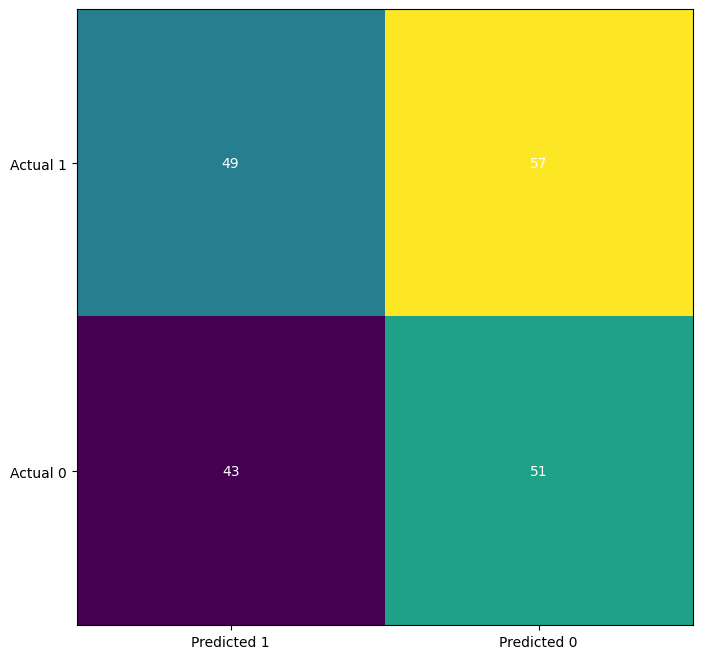

In [18]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, log.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 1', 'Predicted 0'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 1', 'Actual 0'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [19]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.46      0.49       106
           1       0.47      0.54      0.50        94

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [20]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [21]:
import math
def plot_distribution(vocabulary):
    hist, edges = np.histogram(list(map(lambda x:math.log(x[1]),vocabulary.most_common())), density=True, bins=500)
    p = figure(tools="pan,wheel_zoom,reset,save",
               toolbar_location="above",
               title="Word distribution accross all sentences")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555", )
    show(p)
plot_distribution(vocab)